In [2]:

import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg


ModuleNotFoundError: No module named 'pandas'

In [3]:
img = mpimg.imread(r"C:\Users\exact\OneDrive\Desktop\minor project\Prepared Data\closed_eyes\s0004_00318_0_0_0_0_1_01.png")
plt.imshow(img, cmap=plt.cm.gray)

NameError: name 'mpimg' is not defined

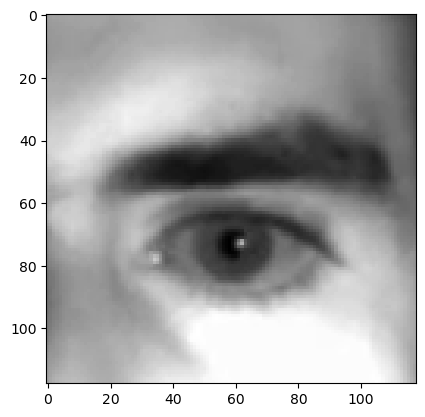

In [4]:
img = mpimg.imread(r'C:\Users\exact\OneDrive\Desktop\minor project\Prepared Data\train\open_eyes\s0012_05817_0_0_1_2_1_03.png')
plt.imshow(img, cmap=plt.cm.gray)

In [7]:
X = []
Y = []

for i in tqdm(glob(r"C:\Users\exact\Downloads\Prepared Data\train\open_eyes")):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob(r"C:\Users\exact\Downloads\Prepared Data\train\closed_eyes")):

    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0) 
X[0]    

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\exact\\Downloads\\Prepared Data\\train\\open_eyes'

In [92]:
X= np.array(X).reshape(4000,-1)
X = X/255.0
Y = np.array(Y)

In [93]:
X[1],Y.shape

(array([0.16078431, 0.16862745, 0.18431373, ..., 0.39607843, 0.34509804,
        0.32941176]), (4000,))

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [95]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [96]:
y2 = svc.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.999


In [1]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

NameError: name 'y_test' is not defined

In [99]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result

,original,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
995,1,1
996,1,1
997,1,1
998,1,1
